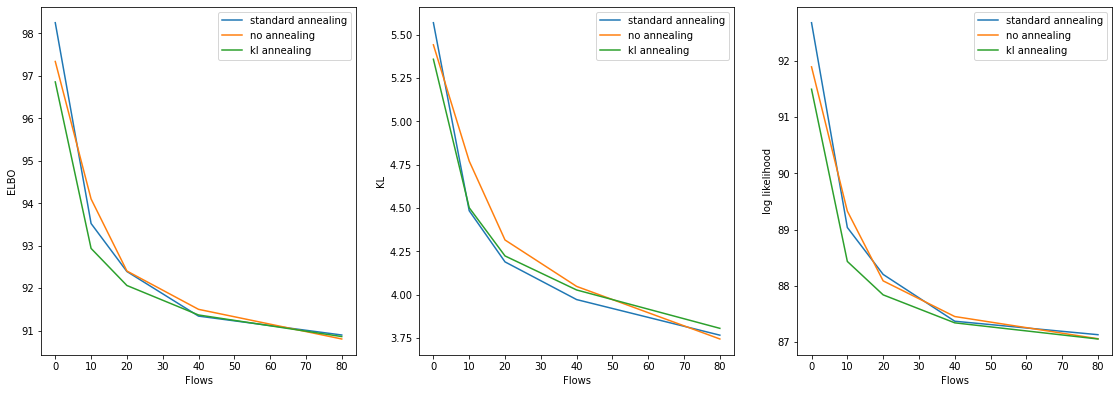

In [21]:
import json
import os
import matplotlib.pyplot as plt

flows = [0, 10, 20, 40, 80]
anneals = ["std", "without", "kl"]

path = "logs/planarflow_k_"

ELBO_stdanneal = []
ELBO_withoutanneal = []
ELBO_klanneal = []

log_likelihood_stdanneal = []
log_likelihood_withoutanneal = []
log_likelihood_klanneal = []

kl_stdanneal = []
kl_withoutanneal = []
kl_klanneal = []

def graph(metric, stdlist, withoutlist, kllist):
    for flow in flows:
        kpath = path + str(flow)
        for anneal in anneals:
            rpath = "results_" + anneal + "annealing.json"
            filepath = os.path.join(kpath, rpath)
            with open(filepath) as file:
                data = json.load(file)
                if anneal == "std":
                    list = stdlist
                elif anneal == "without":
                    list = withoutlist
                elif anneal == "kl":
                    list = kllist
                list.append(data[metric])
    plt.plot(flows, stdlist, label = "standard annealing")
    plt.plot(flows, withoutlist, label = "no annealing")
    plt.plot(flows, kllist, label = "kl annealing")

def klgraph(kl_stdlist, kl_withoutlist, kl_kllist, ELBO_stdlist, ELBO_withoutlist, ELBO_kllist, LL_stdlist, LL_withoutlist, LL_kllist):
    for i in range(5):
        kl_stdlist.append(-1 * LL_stdlist[i] + ELBO_stdlist[i])
        kl_withoutlist.append(-1 * LL_withoutlist[i] + ELBO_withoutlist[i])
        kl_kllist.append(-1 * LL_kllist[i] + ELBO_kllist[i])
    plt.plot(flows, kl_stdlist, label = "standard annealing")
    plt.plot(flows, kl_withoutlist, label = "no annealing")
    plt.plot(flows, kl_kllist, label = "kl annealing")
    
plt.figure(figsize=(19.2,6.4))
plt.subplot(1,3,1)
graph("ELBO", ELBO_stdanneal, ELBO_withoutanneal, ELBO_klanneal)
plt.xlabel("Flows")
plt.ylabel("ELBO")
plt.legend()
plt.subplot(1,3,3)
graph("Log_likelihood", log_likelihood_stdanneal, log_likelihood_withoutanneal, log_likelihood_klanneal)
plt.xlabel("Flows")
plt.ylabel("log likelihood")
plt.legend()
plt.subplot(1,3,2)
klgraph(kl_stdanneal, kl_withoutanneal, kl_klanneal, ELBO_stdanneal, ELBO_withoutanneal, ELBO_klanneal, log_likelihood_stdanneal, log_likelihood_withoutanneal, log_likelihood_klanneal)
plt.xlabel("Flows")
plt.ylabel("KL")
plt.legend()
plt.show()